Repeating the contents of http://appliedprogramming.net/machine-learning/introduction.html

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets

#### Supervised classification

In [2]:
iris = datasets.load_iris()
x_iris, y_iris = iris.data, iris.target
print(f'x.shape: {x_iris.shape}, y.shape - {y_iris.shape}')

x.shape: (150, 4), y.shape - (150,)


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

Text(0,0.5,'width')

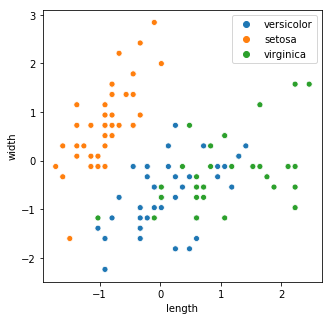

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x_iris[:,:2], y_iris, test_size=0.25, random_state=33)

# scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
labels = [iris.target_names[o] for o in y_train]

fig, ax = plt.subplots(figsize=((5,5)))
sns.scatterplot(x_train[:,0], x_train[:, 1], hue=labels)
ax.set_xlabel('length')
ax.set_ylabel('width')

In [5]:
classifier = SGDClassifier()
classifier

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [6]:
classifier.fit(x_train, y_train)

/Users/achinta/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [7]:
classifier.coef_

array([[-30.79833395,  15.06870628],
       [-14.16137741, -12.21001281],
       [  8.82424175,   2.10768078]])

The classifier learnt coefficients for 3 planes, as it does a one-vs-many classification. Let us plot these planes

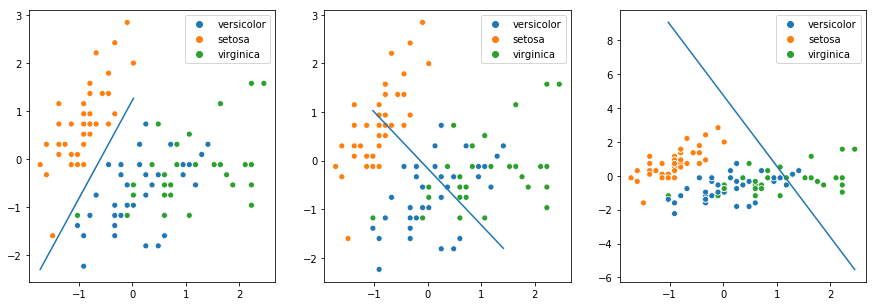

In [8]:
x_min, x_max = x_train[:,0].min() - 0.5, x_train[:,0].max() + 0.5
y_min, y_max = x_train[:,1].min() - 0.5, x_train[:,1].max() + 0.5
def plot_x(idx, ax):
    xs = x_train[:,0][y_train == idx]
    ys = (-classifier.intercept_[idx]-xs*classifier.coef_[idx,0])/classifier.coef_[idx,1]
    sns.scatterplot(x_train[:,0], x_train[:,1], hue=labels, ax=ax)
    sns.lineplot(xs, ys, ax=ax)
    
fig, axs = plt.subplots(1, 3, figsize=(15,5))
for idx in range(len(iris.target_names)):
    plot_x(idx, axs[idx])

### Evaluating our results

In [9]:
from sklearn import metrics
y_pred = classifier.predict(x_test)

print(f'accuracy - {metrics.accuracy_score(y_test, y_pred)}')

accuracy - 0.5


In [10]:
print(metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       0.00      0.00      0.00         8
 versicolor       0.00      0.00      0.00        11
  virginica       0.50      1.00      0.67        19

avg / total       0.25      0.50      0.33        38



/Users/achinta/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 0  0  8]
 [ 0  0 11]
 [ 0  0 19]]


#### Cross Validation

In [20]:
from sklearn.cross_validation import cross_val_score, KFold

clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_model', SGDClassifier())
])

# create a kfold cross validation iterator
cv = KFold(x_iris.shape[0], n_folds=5, shuffle=True, random_state=33)
cv

sklearn.cross_validation.KFold(n=150, n_folds=5, shuffle=True, random_state=33)

In [23]:
scores = cross_val_score(clf, x_iris, y_iris, cv=cv)
scores

/Users/achinta/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/achinta/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/ach

array([0.86666667, 0.86666667, 0.63333333, 0.9       , 0.66666667])

## Clustering

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size=0.25)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [28]:
from sklearn import cluster
clf_sepal = cluster.KMeans(init='k-means++', n_clusters=3, random_state=33)
clf_sepal.fit(x_train[:, 0:2])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=33, tol=0.0001, verbose=0)

Print the labels assigned

In [31]:
print(clf_sepal.labels_)

[1 0 1 2 2 1 0 2 0 0 2 1 1 2 1 2 2 2 0 2 2 0 2 2 2 0 2 2 1 1 1 1 0 0 0 2 2
 0 0 0 0 2 0 2 2 1 1 1 0 2 0 2 1 2 1 0 2 1 0 2 1 0 1 2 1 2 2 2 1 2 0 1 2 1
 0 1 0 0 2 2 0 1 0 1 2 0 2 1 0 2 0 0 2 1 2 0 1 2 2 0 0 0 2 0 1 1 0 0 0 2 2
 0]


In [45]:
colormarkers = [['red', 's'], ['greenyellow', 'o'], ['blue', 'x']]
step = 0.01
margin = 0.1
sl_min, sl_max = x_train[:, 0].min() - margin, x_train[:, 0].max() + margin
sw_min, sw_max = x_train[:, 1].min() - margin, x_train[:, 1].max() + margin

# meshgrid returns two vectors one for x and y of length xy, which reprsent coordinates for the xy points. 
sl, sw = np.meshgrid(np.arange(sl_min, sl_max, step),
                     np.arange(sw_min, sw_max, step))
zs = clf_sepal.predict(np.c_[sl.ravel(), sw.ravel()]).reshape(sl.shape)
centroids_s = clf_sepal.cluster_centers_

Display the data points and the calculated regions

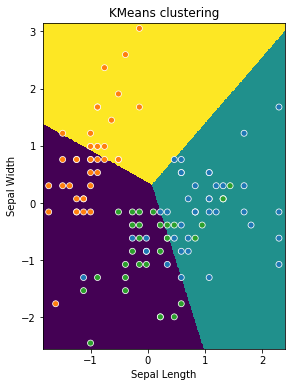

In [62]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(zs, interpolation='nearest',  extent=(sl.min(), sl.max(), sw.min(), sw.max()))
ax.set_xlim(sl_min, sl_max)
ax.set_ylim(sw_min, sw_max)
ax.set(xlabel='Sepal Length', ylabel='Sepal Width', title='KMeans clustering')
hues = [colormarkers[o][0] for o in y_train]
markers = [colormarkers[o][1] for o in y_train]
sns.scatterplot(x_train[:,0], x_train[:,1], hue=hues, markers=markers, legend=False)

### Supervised Learning: Regression

In [74]:
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
boston = load_boston()
print(f'shape - {boston.data.shape}')
print(f'boston feature names - {boston.feature_names}')

shape - (506, 13)
boston feature names - ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [72]:
x_train = boston.data
y_train = boston.target
x_train = StandardScaler().fit_transform(x_train)
y_train = StandardScaler().fit_transform(np.expand_dims(y_train, axis=1))
y_train.shape

(506, 1)

In [81]:
import sklearn
def train_and_evaluate(model, x_train, y_train, folds):
    model.fit(x_train, y_train)
    print(f'score on training set {model.score(x_train, y_train):.2f}')
    cv = sklearn.cross_validation.KFold(x_train.shape[0], folds, shuffle=True, random_state=33)
    scores = sklearn.cross_validation.cross_val_score(model, x_train, y_train, cv=cv)
    print(f'Avg score using {folds} cross validation {np.mean(scores):.2f}')

In [82]:
model = SGDRegressor(loss='squared_loss', penalty='l2', random_state=33)
train_and_evaluate(model, x_train, y_train, 5)

score on training set 0.73
Avg score using 5 cross validation 0.70


/Users/achinta/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/achinta/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/achinta/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> i